<a href="https://colab.research.google.com/github/aaeshaalarouki/GazaSkyGeeks/blob/main/realestateprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

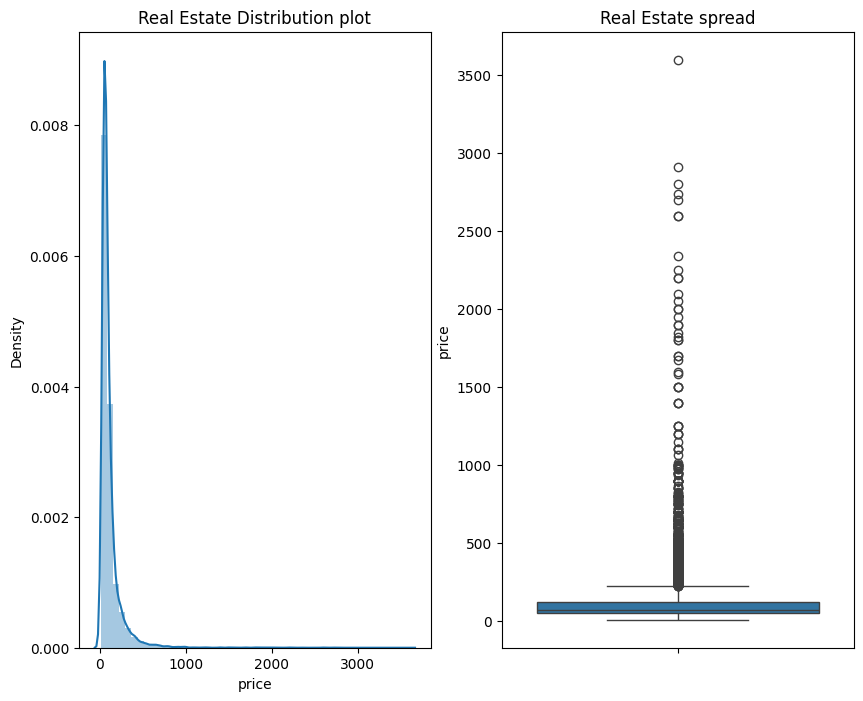

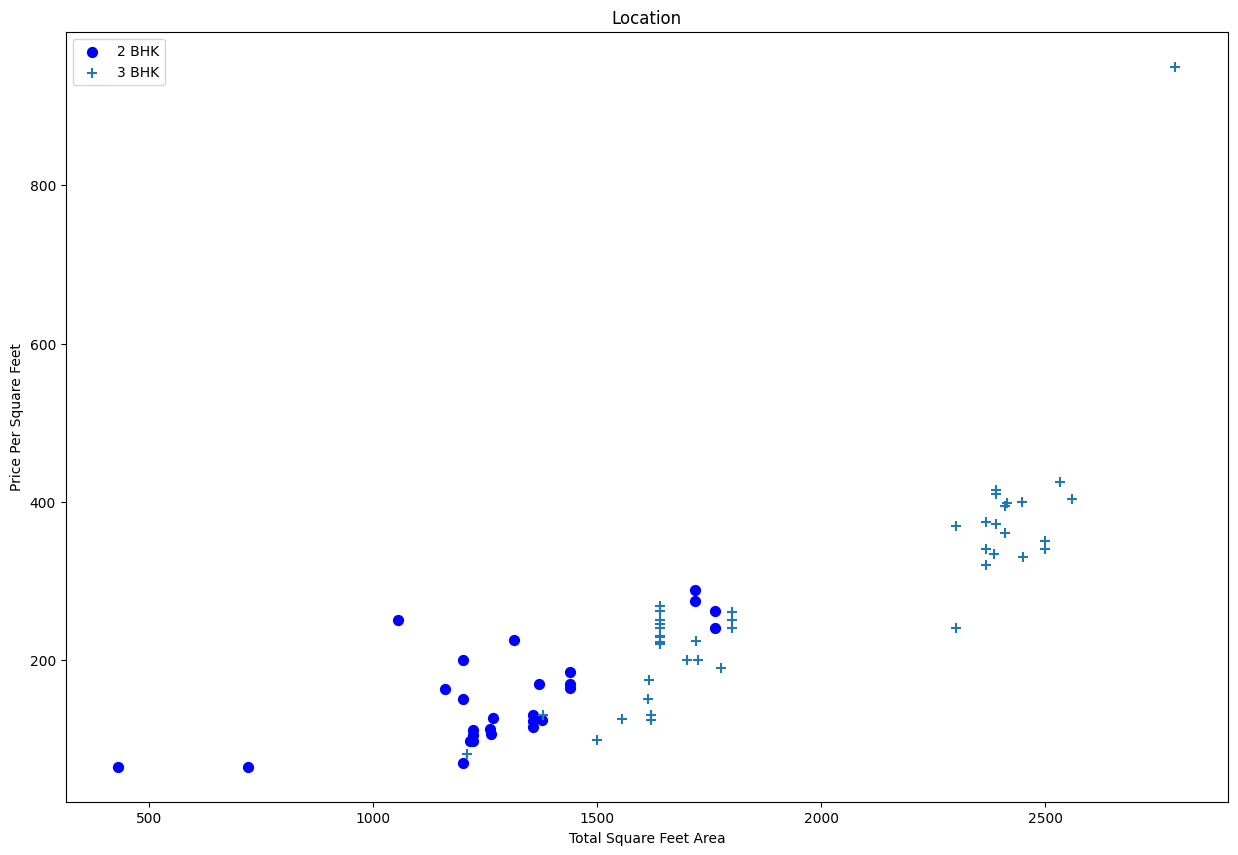

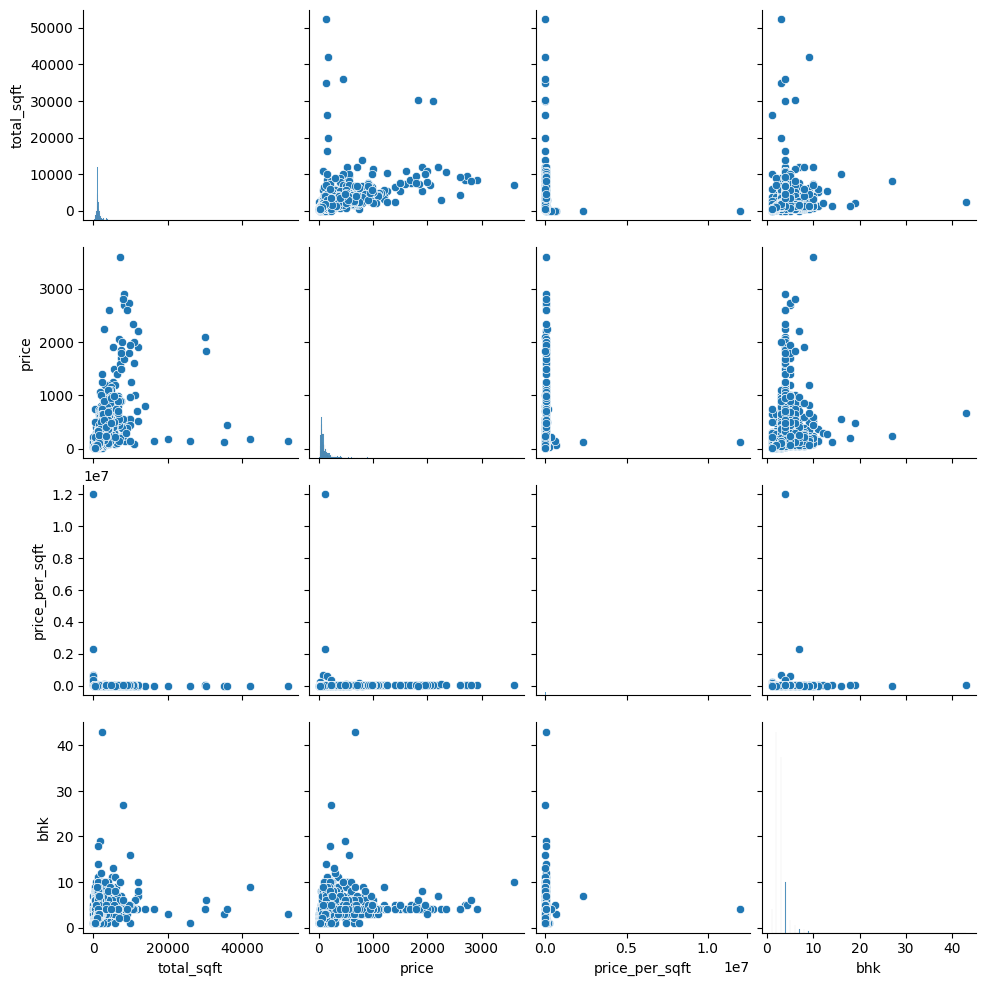

total_sqft        35
bhk                0
price_per_sqft    35
dtype: int64
total_sqft        11
bhk                0
price_per_sqft    11
dtype: int64
total_sqft        0
bhk               0
price_per_sqft    0
dtype: int64
total_sqft        0
bhk               0
price_per_sqft    0
dtype: int64
       Actual Price  Predicted Price
12458         70.00       109.982267
12118         45.00        89.428561
10205         58.00       104.483338
10346         60.00        72.958595
2453         102.00       133.853699
9424          46.50        62.043987
6042          37.72       103.586235
5589          60.00         7.848602
11694         55.00        74.597597
7657         750.00        -1.337910
Predicted Price for the new property: 113.75 INR
R² Score: 0.2838
R² Score Using KNN: 0.8172


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


df1 = pd.read_csv('/content/Bengaluru_House_Data.csv')
#df1.head()
#df1.tail()
#df1.describe()


#df1.shape
df2 = df1.groupby('area_type')['area_type'].agg('count')
#df2.head()

df2 = df1.drop (['area_type', 'society','balcony','availability'], axis = 'columns')
df2.head()

#df2.isnull().sum()

df3 = df2.dropna()
df3.isnull().sum()

df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()
df3['bhk'].unique()

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df3[~df3['total_sqft'].apply(is_float)].head(10)

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
convert_sqft_to_num('2000 - 2850 ')
convert_sqft_to_num('4125Perch')
df4  = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()
df5= df4.copy()
df5.head()
df5['price_per_sqft']  = df5['price']*100000/df5['total_sqft']
df5.head(10)


plt.figure(figsize=(10, 8))
plt.subplot(1,2,1)
plt.title('Real Estate Distribution plot')
sns.distplot(df5.price)


plt.subplot(1,2,2)
plt.title('Real Estate spread')
sns.boxplot(y=df5.price)

plt.show()
plt.show()




def plot_scatter_chart(RE,location):
    bhk2 = RE[(RE.location==location) & (RE.bhk == 2)]
    bhk3 = RE[(RE.location==location) & (RE.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price, color ='blue', label ='2 BHK', s = 50)
    plt.scatter (bhk3.total_sqft,bhk3.price, marker= '+', label = '3 BHK' , s = 50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title('Location')
    plt.legend()


plot_scatter_chart(df5, 'Rajaji Nagar')

columns_to_plot = ['total_sqft', 'price', 'price_per_sqft', 'bhk']
sns.pairplot(df5[columns_to_plot])
plt.show()

X = df5[['total_sqft', 'bhk', 'price_per_sqft']]
y = df5['price']

from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)



model = LinearRegression()
print(X_train.isnull().sum())
print(X_test.isnull().sum())
X_train = X_train.dropna()
X_test = X_test.dropna()
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

print(X_train.isnull().sum())
print(X_test.isnull().sum())
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.linear_model import LinearRegression
lr_clf=  LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test,y_test)

y_pred = model.predict(X_test)
results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print(results.head(10))

new_property = pd.DataFrame([[1500, 3, 5000]], columns=['total_sqft', 'bhk', 'price_per_sqft'])


for col in X_train.columns:
    if col.startswith('location_'):
        new_property[col] = 0
new_property['location_Indira Nagar'] = 1


new_property = new_property[X_train.columns]


predicted_price = model.predict(new_property)
print(f"Predicted Price for the new property: {predicted_price[0]:,.2f} INR")

from sklearn.metrics import r2_score


y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)


print(f"R² Score: {r2:.4f}")

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score


knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)


r2_knn = r2_score(y_test, y_pred_knn)
print(f"R² Score Using KNN: {r2_knn:.4f}")











